In [38]:
import pandas as pd
 
 
grades = {
    "name": ["Mike", "Sherry", "Cindy", "John"],
    "math": [80, 75, 93, 86],
    "chinese": [63, 90, 85, 70]
}
 
df = pd.DataFrame(grades)
 
print("原來的df")
print(df)
 
print("============================")
 
new_df = df.sort_values(["math"], ascending=True)
print("遞增排序")
print(new_df)
 
print("============================")
 
new_df = df.sort_values(["math"], ascending=False)
print("遞減排序")
print(new_df)

原來的df
     name  math  chinese
0    Mike    80       63
1  Sherry    75       90
2   Cindy    93       85
3    John    86       70
遞增排序
     name  math  chinese
1  Sherry    75       90
0    Mike    80       63
3    John    86       70
2   Cindy    93       85
遞減排序
     name  math  chinese
2   Cindy    93       85
3    John    86       70
0    Mike    80       63
1  Sherry    75       90


In [39]:
import pandas as pd

data = {
  "name": ["Sally", "Mary", "John"],
  "age": [50, 40, 30],
  "qualified": [True, False, False]
}

df = pd.DataFrame(data)

newdf = df.drop("name", axis='columns')
print(newdf.columns)

Index(['age', 'qualified'], dtype='object')


In [40]:
import pandas as pd

# 創建一個有兩個欄位的資料框
df = pd.DataFrame({'col1': [1, 2, 3], 'col2': ['a', 'b', 'c']})

# 新增一個名為 'new_column' 的欄位，並指定所有列的值為 [4, 5, 6]
df['new_column'] = [4, 5, 6]
df.columns.unique().tolist()
my_list = df.columns.unique().tolist()
my_str = ', '.join(['{}'] * len(my_list)).format(*my_list)
print(my_str)


col1, col2, new_column


In [41]:
import pandas as pd

# 創建一個 DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# 定義一個列表
new_column = ['x', 'y', 'z']

# 將列表賦值給 DataFrame 中的一個欄位
df['C'] = new_column

print(df)

   A  B  C
0  1  4  x
1  2  5  y
2  3  6  z


In [42]:
import pandas as pd

# 創建一個 DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})

# 在索引為 1 的位置新增一個名為 'D' 的欄位，並將其值設置為 10
df.loc[1, 'D'] = 10

print(df)

   A  B  C     D
0  1  4  7   NaN
1  2  5  8  10.0
2  3  6  9   NaN


In [ ]:
######by chatgpt
import matplotlib.pyplot as plt
cross_tab = pd.crosstab(oedf['device'], oedf['adaptivity level'])
plt.imshow(cross_tab, cmap='Blues')
plt.xticks(range(len(cross_tab.columns)), cross_tab.columns, rotation=90)
plt.yticks(range(len(cross_tab.index)), cross_tab.index)
plt.colorbar()
plt.title('device and adaptivity level')
plt.show()

In [ ]:
######by chatgpt
import matplotlib.pyplot as plt

# 创建交叉表
cross_tab = pd.crosstab(oedf['age'], oedf['adaptivity level'])
# 创建热力图
plt.imshow(cross_tab, cmap='Blues')
# 设置坐标轴标签
plt.xticks(range(len(cross_tab.columns)), cross_tab.columns, rotation=20)
plt.yticks(range(len(cross_tab.index)), cross_tab.index)
# 添加颜色条
plt.colorbar()
# 添加标题
plt.title('Age and Adaptivity level')
# 显示图形
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns


# 创建交叉表
cross_tab = pd.crosstab(oedf['IT student'], oedf['gender'], margins=True)

# 显示交叉表
print(cross_tab)

# 使用热力图可视化交叉表
sns.heatmap(cross_tab, cmap='Blues', annot=True, fmt='d')



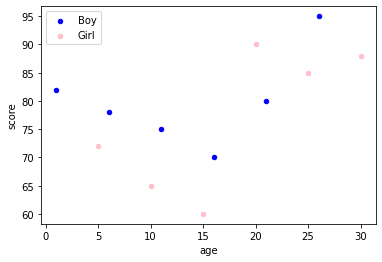

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# 創建範例數據
data = {
    'age': [21, 25, 16, 20, 11, 15, 26, 30, 6, 10, 1, 5],
    'education': ['University', 'College', 'School', 'University', 'College', 'School', 'University', 'College', 'School', 'University', 'College', 'School'],
    'score': [80, 85, 70, 90, 75, 60, 95, 88, 78, 65, 82, 72],
    'gender': ['Boy', 'Girl', 'Boy', 'Girl', 'Boy', 'Girl', 'Boy', 'Girl', 'Boy', 'Girl', 'Boy', 'Girl']
}
df = pd.DataFrame(data)

# 繪製散點圖
colors = {'Boy': 'blue', 'Girl': 'pink'}
fig, ax = plt.subplots()
grouped = df.groupby('gender')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='score', label=key, color=colors[key])
plt.show()


以Kaggle上"Students Adaptability Level in Online Education"資料集為例，其男女比例為55:45，在進行IT student 與gender間的分析，要如何減少男女比例不平衡帶來的影響？用python解決
可以進行分層抽樣 (stratified sampling)，將樣本分層後在每個層次內進行隨機抽樣，使得樣本更能代表整體族群，進而減少比例不平衡所帶來的影響。

以下是一個示範：

首先，我們可以使用 pandas 的 crosstab 函數來計算 IT student 與 gender 的交叉表，以瞭解男女比例不平衡的情況。

python
Copy code
import pandas as pd

# 讀取資料集
df = pd.read_csv('StudentsAdaptability.csv')

# 計算 IT student 與 gender 的交叉表
crosstab = pd.crosstab(df['IT Student'], df['Gender'])
print(crosstab)
執行結果：

yaml
Copy code
Gender      Boy  Girl
IT Student          
No          352   296
Yes         199   190
可以看出男女比例確實不平衡。

接著，我們可以使用 StratifiedShuffleSplit 類別進行分層抽樣。以下是示範程式碼：


from sklearn.model_selection import StratifiedShuffleSplit

# 將資料分成訓練集和測試集，並進行分層抽樣
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Gender']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]
上述程式碼中，我們使用 StratifiedShuffleSplit 類別將資料分成訓練集和測試集，並將 Gender 作為分層依據。這樣可以確保在訓練集和測試集中男女比例的比例相同。

最後，我們可以再次計算 IT student 與 gender 的交叉表，以確認分層抽樣的效果。


# 計算分層抽樣後的 IT student 與 gender 的交叉表
train_crosstab = pd.crosstab(train_set['IT Student'], train_set['Gender'])
test_crosstab = pd.crosstab(test_set['IT Student'], test_set['Gender'])

print('Training set:')
print(train_crosstab)
print('Testing set:')
print(test_crosstab)
執行結果：


Training set:
Gender      Boy  Girl
IT Student          
No          281   237
Yes         159   152

Testing set:
Gender      Boy  Girl
IT Student          
No           71    59
Yes          40    38